In [2]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 65.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatibl

In [3]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
# CREATE DIRECTORY OF AUDIO FILES 
IEMOCAP = "/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/"
dir_list = os.listdir(IEMOCAP)
dir_list.sort()
dir_list

['Documentation', 'Session1', 'Session2', 'Session3', 'Session4', 'Session5']

In [6]:
df = pd.read_csv('/kaggle/input/iemocap-meta-data/iemocap_meta_extracted.csv', header=None, names=['path', 'emotion'])
df = df.drop(0)
df.head(5)

,path,emotion
1,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,neu
2,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,neu
3,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,neu
4,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,neu
5,Session1/sentences/wav/Ses01F_impro01/Ses01F_i...,fru


In [7]:
df['path'] = '/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/' + df['path']
ref = df
ref.head(5)

,path,emotion
1,/kaggle/input/iemocapfullrelease/IEMOCAP_full_...,neu
2,/kaggle/input/iemocapfullrelease/IEMOCAP_full_...,neu
3,/kaggle/input/iemocapfullrelease/IEMOCAP_full_...,neu
4,/kaggle/input/iemocapfullrelease/IEMOCAP_full_...,neu
5,/kaggle/input/iemocapfullrelease/IEMOCAP_full_...,fru


In [8]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,path,emotion
2973,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session3/sentences/wav/Ses03M_impro02/Ses03M_impro02_M006.wav,sad
1164,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro04/Ses01F_impro04_M016.wav,neu
2704,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session2/sentences/wav/Ses02M_script03_1/Ses02M_script03_1_M011.wav,hap
4811,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session4/sentences/wav/Ses04F_impro03/Ses04F_impro03_F052.wav,exc
5628,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session4/sentences/wav/Ses04F_script03_2/Ses04F_script03_2_M041.wav,ang
...,...,...
1385,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_script02_2/Ses01M_script02_2_M033.wav,ang
2767,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session2/sentences/wav/Ses02M_script01_1/Ses02M_script01_1_M031.wav,fru
3620,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session3/sentences/wav/Ses03M_script02_2/Ses03M_script02_2_F012.wav,fru
5292,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session4/sentences/wav/Ses04M_impro04/Ses04M_impro04_F010.wav,sur


<Axes: ylabel='count'>

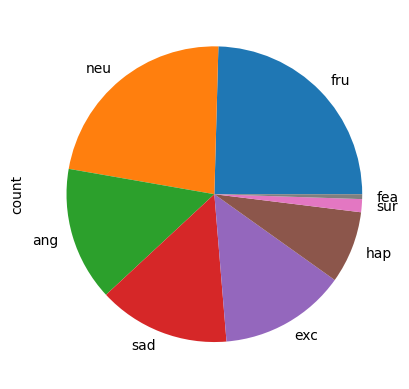

In [9]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [12]:
ref=ref.groupby('emotion').head(150)
ref['emotion'].value_counts()

emotion
neu    150
fru    150
ang    150
exc    150
hap    150
sad    150
sur    107
fea     40
Name: count, dtype: int64

In [10]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:0000:0100:01


In [11]:
import resampy
from resampy import resample
import librosa

In [13]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

1047


,Features
0,"[-19.159740447998047, -15.777589797973633, -15.440980911254883, -16.070579528808594, -15.15794563293457, -14.111282348632812, -14.267326354980469, -16.135059356689453, -18.488927841186523, -15.443876266479492, -15.058652877807617, -14.895322799682617, -13.99101734161377, -15.07423210144043, -15.780424118041992, -14.988533020019531, -13.834707260131836, -12.84861946105957, -14.194981575012207, -14.215968132019043, -12.377684593200684, -12.115699768066406, -12.480737686157227, -14.23602294921875, -14.481677055358887, -12.368274688720703, -12.374567031860352, -14.323114395141602, -15.336008071899414, -13.599647521972656, -13.638656616210938, -14.621479988098145, -13.597665786743164, -12.999547004699707, -13.048147201538086, -14.646588325500488, -14.961224555969238, -15.550710678100586, -15.38103199005127, -15.662149429321289, -14.237325668334961, -13.08155632019043, -15.241602897644043, -16.582902908325195, -18.159305572509766, -16.826129913330078, -15.138936042785645, -14.58137035369873, -15.594836235046387, -15.359048843383789, -14.989802360534668, -14.13086223602295, -13.742383003234863, -13.436161994934082, -14.648977279663086, -15.154558181762695, -15.802919387817383, -15.080065727233887, -14.997152328491211, -16.50243377685547, -16.706104278564453, -16.783157348632812, -14.200398445129395, -13.129173278808594, -13.618965148925781, -14.381489753723145, -15.452186584472656, -16.91398048400879, -14.908915519714355, -13.715131759643555, -13.90678882598877, -15.319070816040039, -15.687479019165039, -15.211309432983398, -15.66981029510498, -16.292346954345703, -15.439773559570312, -15.899778366088867, -13.85515308380127, -13.566225051879883, -14.774470329284668, -15.068507194519043, -16.25972557067871, -15.505702018737793, -13.35291862487793, -14.429400444030762, -15.131390571594238, -13.242838859558105, -13.363510131835938, -14.789360046386719, -14.834185600280762, -15.14031982421875, -15.547503471374512, -14.468416213989258, -12.767953872680664, -13.987442016601562, -15.07476806640625, -14.073738098144531, -12.41603946685791, -12.007455825805664, ...]"
1,"[-16.402360916137695, -16.272262573242188, -15.090825080871582, -15.669881820678711, -16.80646324157715, -15.905245780944824, -14.4086332321167, -13.549032211303711, -13.398409843444824, -12.202515602111816, -11.284871101379395, -12.62531566619873, -11.57435417175293, -11.491617202758789, -11.696423530578613, -9.793767929077148, -9.575773239135742, -10.831647872924805, -8.5282564163208, -8.237916946411133, -10.138813972473145, -10.550975799560547, -11.621959686279297, -12.063175201416016, -13.380531311035156, -14.05034351348877, -14.202043533325195, -14.557893753051758, -15.298466682434082, -13.355634689331055, -12.12713623046875, -11.827508926391602, -12.326942443847656, -13.849782943725586, -13.002507209777832, -11.822381973266602, -12.297614097595215, -14.471498489379883, -13.573153495788574, -14.988348007202148, -14.365450859069824, -15.852767944335938, -17.74652671813965, -16.91687774658203, -15.300443649291992, -14.817686080932617, -14.57848834991455, -14.760858535766602, -14.651079177856445, -16.657093048095703, -15.989118576049805, -14.503865242004395, -13.861650466918945, -15.721925735473633, -15.617976188659668, -17.40192413330078, -16.522985458374023, -14.146650314331055, -14.342935562133789, -16.220664978027344, -15.844650268554688, -14.242269515991211, -15.31611156463623, -15.482403755187988, -16.732900619506836, -16.810081481933594, -14.534164428710938, -12.900178909301758, -13.222990036010742, -15.900808334350586, -16.592512130737305, -15.11237621307373, -14.351170539855957, -14.454826354980469, -13.932313919067383, -11.883322715759277, -13.592012405395508, -44.608802795410156, -42.32727813720703, -40.838138580322266, -40.156410217285156, -40.05534744262695, -38.44381332397461, -35.92236328125, -32.66558837890625, -29.481399536132812, -26.31717300415039, -23.760404586791992, -20.9667911529541, -18.995851516723633, -16.66529655456543, -15.87165832519

In [14]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,path,emotion,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
1,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav,neu,-16.402361,-16.272263,-15.090825,-15.669882,-16.806463,-15.905246,-14.408633,-13.549032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F001.wav,neu,-19.568199,-16.112581,-13.948700,-13.871867,-13.847982,-13.107259,-14.036410,-15.617081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F002.wav,neu,-15.915721,-15.894015,-16.306347,-16.822659,-16.726360,-14.380559,-14.576647,-13.624619,...,0.556673,0.488490,0.508272,0.571248,0.584140,0.532304,0.523810,0.545939,0.609024,0.059400
4,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F005.wav,neu,-9.531640,-11.703763,-13.733652,-13.488281,-11.904651,-10.735186,-10.349615,-11.255803,...,0.477617,0.514228,0.562991,0.542024,0.521395,0.500644,0.511965,0.547318,0.543252,0.090194
5,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F006.wav,fru,-6.210481,-9.177879,-13.875667,-16.804911,-15.888870,-15.865041,-14.684553,-15.555921,...,0.602963,0.654776,0.655985,0.642673,0.604672,0.536771,0.532431,0.585454,0.623179,0.048864


In [15]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(1286, 533)


,path,emotion,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
1,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav,neu,-16.402361,-16.272263,-15.090825,-15.669882,-16.806463,-15.905246,-14.408633,-13.549032,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F001.wav,neu,-19.568199,-16.112581,-13.948700,-13.871867,-13.847982,-13.107259,-14.036410,-15.617081,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F002.wav,neu,-15.915721,-15.894015,-16.306347,-16.822659,-16.726360,-14.380559,-14.576647,-13.624619,...,0.556673,0.488490,0.508272,0.571248,0.584140,0.532304,0.523810,0.545939,0.609024,0.059400
4,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F005.wav,neu,-9.531640,-11.703763,-13.733652,-13.488281,-11.904651,-10.735186,-10.349615,-11.255803,...,0.477617,0.514228,0.562991,0.542024,0.521395,0.500644,0.511965,0.547318,0.543252,0.090194
5,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F006.wav,fru,-6.210481,-9.177879,-13.875667,-16.804911,-15.888870,-15.865041,-14.684553,-15.555921,...,0.602963,0.654776,0.655985,0.642673,0.604672,0.536771,0.532431,0.585454,0.623179,0.048864


In [16]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
1212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
377,-6.244214,-8.666529,-11.848776,-12.604165,-12.181480,-12.014817,-11.180746,-11.680216,-13.244037,-12.408221,...,0.429864,0.523613,0.593274,0.652677,0.570469,0.375439,0.336290,0.333675,0.359107,0.065792
1273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
804,-10.755037,-11.286510,-11.690535,-13.227030,-13.395282,-10.669530,-10.296241,-9.623849,-8.660384,-8.503301,...,0.504395,0.564326,0.646665,0.676711,0.639945,0.659274,0.717911,0.640486,0.572875,0.042010
315,-9.907522,-9.145596,-10.177784,-10.741758,-9.779580,-11.176264,-11.446882,-11.215982,-10.383276,-10.250620,...,0.673770,0.677093,0.639763,0.040873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
320,-1.380478,-3.703988,-7.816920,-7.101479,-6.656266,-8.435627,-8.654420,-9.221531,-9.861481,-8.981752,...,0.563319,0.579706,0.556234,0.551087,0.563651,0.573537,0.620046,0.614943,0.552954,0.108422
939,-15.684633,-17.198219,-18.358362,-17.677654,-16.199884,-16.841345,-17.681044,-16.604044,-16.997496,-18.374535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
482,-13.086490,-12.471886,-13.309982,-12.838882,-14.185903,-13.498344,-12.634774,-12.667577,-14.589778,-14.579409,...,0.775175,0.773134,0.764924,0.687056,0.626877,0.664511,0.729512,0.764342,0.755242,0.013500
6,-8.012652,-8.282686,-11.163260,-11.518069,-12.119814,-11.263964,-10.919046,-10.623808,-9.784985,-7.551734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:

# # NORMALIZE DATA
# mean = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)
# X_train = (X_train - mean)/std
# X_test = (X_test - mean)/std
# # TURN DATA INTO ARRAYS FOR KERAS
# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_test = np.array(X_test)
# y_test = np.array(y_test)
# # ONE HOT ENCODE THE TARGET
# # CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
# lb = LabelEncoder()
# y_train = to_categorical(lb.fit_transform(y_train))
# y_test = to_categorical(lb.fit_transform(y_test))
# print(y_test[0:10])
# # RESHAPE DATA TO INCLUDE 3D TENSOR
# X_train = X_train[:,:,np.newaxis]
# X_test = X_test[:,:,np.newaxis]

# print(X_train.shape)
# print(X_test.shape)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
# lb.classes_

In [18]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

1047


,mel_spectrogram
0,"[-37.404896, -35.11951, -35.473053, -36.60411, -37.58884, -37.891308, -37.21947, -36.981087, -36.984516, -37.509945, -38.791527, -34.758236, -28.499224, -29.316153, -32.658672, -31.713469, -28.866373, -27.817675, -29.11906, -29.812887, -30.61637, -30.919134, -30.836145, -31.997711, -32.91222, -32.30713, -33.075886, -34.692528, -35.605766, -33.83279, -32.342228, -29.08687, -27.638699, -27.966097, -27.875809, -28.06509, -27.844881, -28.753101, -30.143623, -30.865921, -31.729753, -32.634987, -33.724728, -34.68494, -35.58102, -35.710533, -36.422253, -37.432373, -37.46546, -37.80174, -38.59055, -39.365746, -39.24271, -39.13102, -38.96755, -39.197742, -39.3206, -39.487938, -39.417606, -39.15534, -38.57589, -38.685596, -38.658485, -38.66559, -38.38596, -39.253033, -38.68934, -38.99233, -39.71002, -39.353603, -39.361298, -39.448788, -39.427475, -39.328205, -38.98087, -39.476944, -39.409283, -39.14245, -38.250633, -37.772785, -37.94203, -38.381107, -37.819645, -37.39209, -37.129646, -37.64, -37.08961, -34.857574, -34.890877, -36.23998, -36.151516, -36.032314, -36.540306, -36.730305, -36.241848, -35.690235, -35.915142, -34.90683, -34.189915, -34.06576, ...]"
1,"[-44.608803, -42.32728, -40.83814, -40.15641, -40.055347, -38.443813, -35.922363, -32.66559, -29.4814, -26.317173, -23.760405, -20.966791, -18.995852, -16.665297, -15.871658, -15.77745, -16.439041, -17.30772, -17.999247, -20.060835, -22.376497, -24.836802, -26.6065, -28.06744, -29.65876, -31.486027, -32.336178, -32.838684, -33.887672, -34.331703, -34.70347, -35.37263, -35.018528, -35.31964, -36.45782, -36.923725, -37.050148, -37.92043, -38.07253, -37.982513, -38.59825, -39.258217, -40.160282, -38.531467, -37.12978, -38.33051, -38.97731, -39.66911, -40.41815, -41.03255, -41.1329, -41.10385, -39.810432, -39.511787, -40.025753, -41.527645, -41.46714, -41.063927, -41.995903, -41.58667, -41.79622, -41.509464, -40.813198, -40.706505, -40.409935, -40.34166, -38.507877, -39.084896, -39.553333, -39.710266, -40.889553, -40.2235, -39.89332, -41.334743, -41.562927, -42.358288, -45.243908]"
2,"[-37.15694, -34.40023, -34.057446, -34.388824, -34.7123, -35.240326, -35.497486, -36.4259, -36.71007, -37.08865, -37.575466, -37.74486, -37.810677, -37.993843, -38.138306, -39.22032, -39.887783, -39.88106, -39.650257, -40.167576, -39.79158, -40.84778, -41.673817, -41.18303, -41.097908, -41.29414, -41.399307, -41.65019, -41.82389, -42.197857, -41.724396, -41.431156, -41.417404, -39.978146, -38.88074, -39.111687, -40.344055, -40.455956, -40.370136, -41.269695, -40.864098, -40.47086, -40.02498, -38.94466, -38.84218, -39.607685, -39.765717, -40.08019, -39.84958, -39.089935, -39.3057, -38.844326, -38.642715, -39.0389, -40.30783, -41.102222, -40.904503, -41.193317, -40.906994, -40.116676, -40.829407, -41.58035, -41.482903, -41.98501, -42.087875, -42.23545, -42.56694, -42.332672, -42.03238, -41.992558, -42.331753, -42.40463, -42.310005, -42.392117, -42.614372, -42.60403, -42.601025, -42.600918, -42.772728, -42.162495, -42.695732, -43.36902, -42.962242, -42.874844, -43.174553, -42.876225, -42.639584, -42.6237, -43.34781, -43.336063, -42.91292, -43.20449, -42.775524, -42.330326, -42.404278, -42.894436, -42.518936, -43.193043, -43.12325, -42.814865, ...]"
3,"[-41.01158, -39.296764, -39.359653, -39.45558, -40.18876, -39.886234, -39.600918, -39.809685, -38.986454, -33.752018, -28.11517, -24.438631, -21.68058, -19.205256, -19.006472, -19.844675, -21.191416, -21.402723, -22.776842, -24.071095, -25.105017, -26.535057, -27.271109, -26.24004, -25.269726, -26.27088, -27.873423, -28.931429, -30.026707, -30.999128, -31.515858, -32.88189, -34.134632, -34.703217, -35.210426, -35.972958, -36.609108, -36.983784, -37.04299, -36.343204, -35.313812, -35.100903, -34.491913, -33.64299, -32.6912, -32.487644, -32.743454, -32.099354, -30.089582, -26.911867, -24.312952, -20.465328, -17.688892, -15.858587, -15.463517, -16.336662, -16.539337, -18.821976, -23.574165, -26.081799, -26.729086, -26.831148, -27.494827, -27.

In [19]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,path,emotion,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
1,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav,neu,-44.608803,-42.327278,-40.838139,-40.156410,-40.055347,-38.443813,-35.922363,-32.665588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F001.wav,neu,-37.156940,-34.400230,-34.057446,-34.388824,-34.712299,-35.240326,-35.497486,-36.425900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F002.wav,neu,-41.011581,-39.296764,-39.359653,-39.455582,-40.188759,-39.886234,-39.600918,-39.809685,...,-35.025085,-35.640804,-37.321205,-37.679550,-37.560566,-37.932987,-38.397758,-38.964100,-38.905987,-39.969975
4,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F005.wav,neu,-25.743486,-25.253704,-23.100113,-18.949806,-15.607738,-14.610196,-15.237527,-16.270002,...,-5.290427,-6.441220,-6.696208,-5.907618,-5.739948,-6.140649,-6.215564,-7.778786,-8.413128,-6.422344
5,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F006.wav,fru,-9.236683,-12.197922,-19.316151,-20.330936,-20.257309,-21.505705,-22.592079,-22.144445,...,-20.830692,-19.404533,-15.899262,-14.117649,-16.317736,-21.077135,-23.463013,-24.628326,-23.828331,-21.912806


In [20]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
1212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,-9.728555,-12.000981,-14.923588,-15.204503,-14.854118,-14.717390,-13.885154,-13.533681,-14.472779,-16.002193,...,-21.957579,-21.678091,-21.464748,-22.217148,-22.400826,-21.953339,-20.859295,-20.563099,-21.846931,-20.998240
1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,-29.864887,-27.391108,-27.274740,-28.255564,-26.883911,-24.343081,-21.149097,-17.974714,-16.138006,-14.706437,...,-8.547295,-7.995177,-7.172425,-7.443603,-8.934188,-11.212534,-13.535677,-14.909868,-16.083645,-17.210737
315,-24.742266,-20.912407,-21.000648,-21.535788,-23.288307,-25.465445,-25.910105,-25.789331,-24.262142,-24.239241,...,-32.965427,-32.974575,-33.951050,-33.995659,-33.810947,-34.945576,-36.461277,NaN,NaN,NaN
7306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,-10.818961,-10.957643,-13.624809,-14.620390,-16.991661,-19.546951,-20.875395,-21.755547,-22.120817,-21.925625,...,-6.680302,-6.158255,-6.334514,-6.938326,-7.249344,-7.647808,-8.137721,-8.936786,-9.506696,-9.907718
939,-36.975788,-39.234951,-41.717693,-39.251556,-37.694046,-37.423149,-37.345448,-38.436657,-38.300354,-40.028145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,-40.441505,-39.947472,-40.592152,-40.039467,-40.325214,-40.656570,-40.159328,-40.177017,-41.038063,-40.540855,...,-29.136904,-30.066603,-32.998882,-34.486126,-34.417458,-35.084702,-35.539661,-34.379723,-30.160902,-27.034517
6,-25.553131,-22.787790,-22.815617,-22.897123,-22.573282,-21.897591,-18.837471,-10.984457,-4.487404,-2.673812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1028, 259, 1)
(258, 259, 1)


In [23]:
data_path = pd.concat([df], axis = 0)
# data_path.to_csv(csv_path,index=False)
data_path.head()

,path,emotion,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
1,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav,neu,-44.608803,-42.327278,-40.838139,-40.156410,-40.055347,-38.443813,-35.922363,-32.665588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F001.wav,neu,-37.156940,-34.400230,-34.057446,-34.388824,-34.712299,-35.240326,-35.497486,-36.425900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F002.wav,neu,-41.011581,-39.296764,-39.359653,-39.455582,-40.188759,-39.886234,-39.600918,-39.809685,...,-35.025085,-35.640804,-37.321205,-37.679550,-37.560566,-37.932987,-38.397758,-38.964100,-38.905987,-39.969975
4,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F005.wav,neu,-25.743486,-25.253704,-23.100113,-18.949806,-15.607738,-14.610196,-15.237527,-16.270002,...,-5.290427,-6.441220,-6.696208,-5.907618,-5.739948,-6.140649,-6.215564,-7.778786,-8.413128,-6.422344
5,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F006.wav,fru,-9.236683,-12.197922,-19.316151,-20.330936,-20.257309,-21.505705,-22.592079,-22.144445,...,-20.830692,-19.404533,-15.899262,-14.117649,-16.317736,-21.077135,-23.463013,-24.628326,-23.828331,-21.912806


ValueError: could not convert string to float: 'neu'

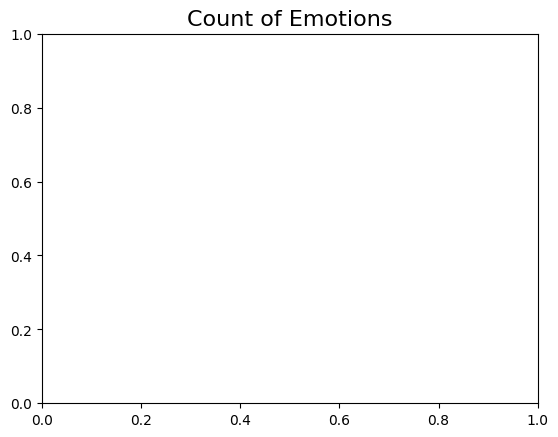

In [24]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [25]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [26]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [27]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [28]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [29]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

TypeError: Invalid file: nan

In [30]:
len(X), len(Y), data_path.path.shape

(3141, 3141, (1286,))

In [31]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.078176,0.766237,0.660930,0.674861,0.699813,0.652369,0.623125,0.623496,0.648030,0.706816,...,5.426504e-09,4.827283e-09,4.400703e-09,4.083973e-09,3.847632e-09,3.674801e-09,3.548794e-09,3.464851e-09,3.413899e-09,neu
1,0.179578,0.807010,0.749262,0.690726,0.721829,0.718333,0.661098,0.615326,0.634006,0.682865,...,1.424108e-04,1.409856e-04,1.566950e-04,1.516007e-04,1.439748e-04,1.472336e-04,1.484563e-04,1.384306e-04,1.451579e-04,neu
2,0.073670,0.748746,0.735097,0.671643,0.654508,0.653287,0.649605,0.615080,0.637584,0.696427,...,5.132994e-09,4.404893e-09,3.889638e-09,3.452195e-09,3.187827e-09,3.052711e-09,2.833091e-09,2.223666e-09,8.900898e-10,neu
3,0.070298,0.804160,0.669910,0.723418,0.703420,0.635514,0.629479,0.695253,0.755410,0.773919,...,6.429178e-06,5.978665e-06,5.659431e-06,5.421914e-06,5.245352e-06,5.119068e-06,5.027466e-06,4.968651e-06,4.932123e-06,neu
4,0.309585,0.803651,0.791969,0.861575,0.823890,0.790927,0.744020,0.748073,0.824771,0.854029,...,9.367031e-04,8.970599e-04,9.835691e-04,9.868266e-04,1.018707e-03,9.718534e-04,9.215586e-04,9.776975e-04,9.953916e-04,neu


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
(2512, 155, 1)
(629, 155, 1)


(3141, 8)

In [33]:
lb.classes_

array(['ang', 'exc', 'fea', 'fru', 'hap', 'neu', 'sad', 'sur'],
      dtype=object)

In [34]:
#Accuarte class labels

In [35]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,path,emotion,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
1,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav,neu,-44.608803,-42.327278,-40.838139,-40.156410,-40.055347,-38.443813,-35.922363,-32.665588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F001.wav,neu,-37.156940,-34.400230,-34.057446,-34.388824,-34.712299,-35.240326,-35.497486,-36.425900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F002.wav,neu,-41.011581,-39.296764,-39.359653,-39.455582,-40.188759,-39.886234,-39.600918,-39.809685,...,-35.025085,-35.640804,-37.321205,-37.679550,-37.560566,-37.932987,-38.397758,-38.964100,-38.905987,-39.969975
4,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F005.wav,neu,-25.743486,-25.253704,-23.100113,-18.949806,-15.607738,-14.610196,-15.237527,-16.270002,...,-5.290427,-6.441220,-6.696208,-5.907618,-5.739948,-6.140649,-6.215564,-7.778786,-8.413128,-6.422344
5,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F006.wav,fru,-9.236683,-12.197922,-19.316151,-20.330936,-20.257309,-21.505705,-22.592079,-22.144445,...,-20.830692,-19.404533,-15.899262,-14.117649,-16.317736,-21.077135,-23.463013,-24.628326,-23.828331,-21.912806
6,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F007.wav,fru,-25.553131,-22.787790,-22.815617,-22.897123,-22.573282,-21.897591,-18.837471,-10.984457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F008.wav,fru,-41.576473,-39.524525,-40.175949,-39.857552,-40.163853,-40.006680,-40.081219,-40.959225,...,-25.806181,-26.341436,-25.511084,-21.890722,-20.447037,-21.284426,-22.826181,-26.202795,-29.317694,-31.256428
8,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F009.wav,fru,-25.155739,-25.109280,-25.293081,-24.920694,-24.094229,-21.874050,-21.869640,-20.614822,...,-22.584597,-24.967777,-27.209826,-28.269342,-28.645653,-28.413733,-29.020384,-30.683331,-31.671169,-32.268085
9,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F011.wav,fru,-1.079106,-2.526771,-6.036305,-7.620799,-7.470832,-7.590826,-9.701918,-11.163941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,/kaggle/input/iemocapfullrelease/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F012.wav,ang,-23.914589,-23.878134,-22.974316,-21.431910,-21.951239,-22.925739,-23.982550,-24.732973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: could not convert string to float: 'neu'

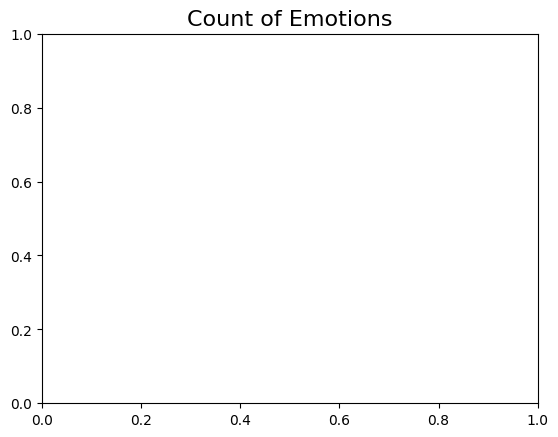

In [36]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [37]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [38]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [39]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [40]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [41]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

TypeError: Invalid file: nan

In [42]:
len(X), len(Y), data_path.path.shape

(4188, 4188, (1286,))

In [43]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.078176,0.766237,0.660930,0.674861,0.699813,0.652369,0.623125,0.623496,0.648030,0.706816,...,5.426504e-09,4.827283e-09,4.400703e-09,4.083973e-09,3.847632e-09,3.674801e-09,3.548794e-09,3.464851e-09,3.413899e-09,neu
1,0.121759,0.779871,0.695155,0.692376,0.715038,0.680740,0.620258,0.607072,0.642551,0.707595,...,3.944058e-05,3.899637e-05,3.758485e-05,3.935138e-05,3.898178e-05,3.959755e-05,3.874956e-05,3.549198e-05,3.827723e-05,neu
2,0.073670,0.748746,0.735097,0.671643,0.654508,0.653287,0.649605,0.615080,0.637584,0.696427,...,5.132994e-09,4.404893e-09,3.889638e-09,3.452195e-09,3.187827e-09,3.052711e-09,2.833091e-09,2.223666e-09,8.900898e-10,neu
3,0.079958,0.744338,0.717360,0.658817,0.671074,0.655081,0.617187,0.597109,0.612310,0.660932,...,5.063681e-09,4.382773e-09,3.882842e-09,3.576031e-09,3.345473e-09,3.172917e-09,3.024231e-09,2.392118e-09,9.932151e-10,neu
4,0.070298,0.804160,0.669910,0.723418,0.703420,0.635514,0.629479,0.695253,0.755410,0.773919,...,6.429178e-06,5.978665e-06,5.659431e-06,5.421914e-06,5.245352e-06,5.119068e-06,5.027466e-06,4.968651e-06,4.932123e-06,neu


In [44]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
(3350, 155, 1)
(838, 155, 1)


(4188, 8)

In [45]:
lb.classes_

array(['ang', 'exc', 'fea', 'fru', 'hap', 'neu', 'sad', 'sur'],
      dtype=object)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
Accuracy Score for model1 =  0.16945107398568018
Accuracy Score for model2 =  0.15632458233890215
Accuracy Score for model3 =  0.19689737470167065
Accuracy Score for average ensemble =  0.18496420047732698
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
Weighted average method
Accuracy Score for model1 =  0.16945107398568018
Accuracy Score for model2 =  0.15632458233890215
Accuracy Score for model3 =  0.19689737470167065
Accuracy Score for average ensemble =  0.18496420047732698
Accuracy Score for weighted average ensemble =  0.18496420047732698
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
Max accuracy of

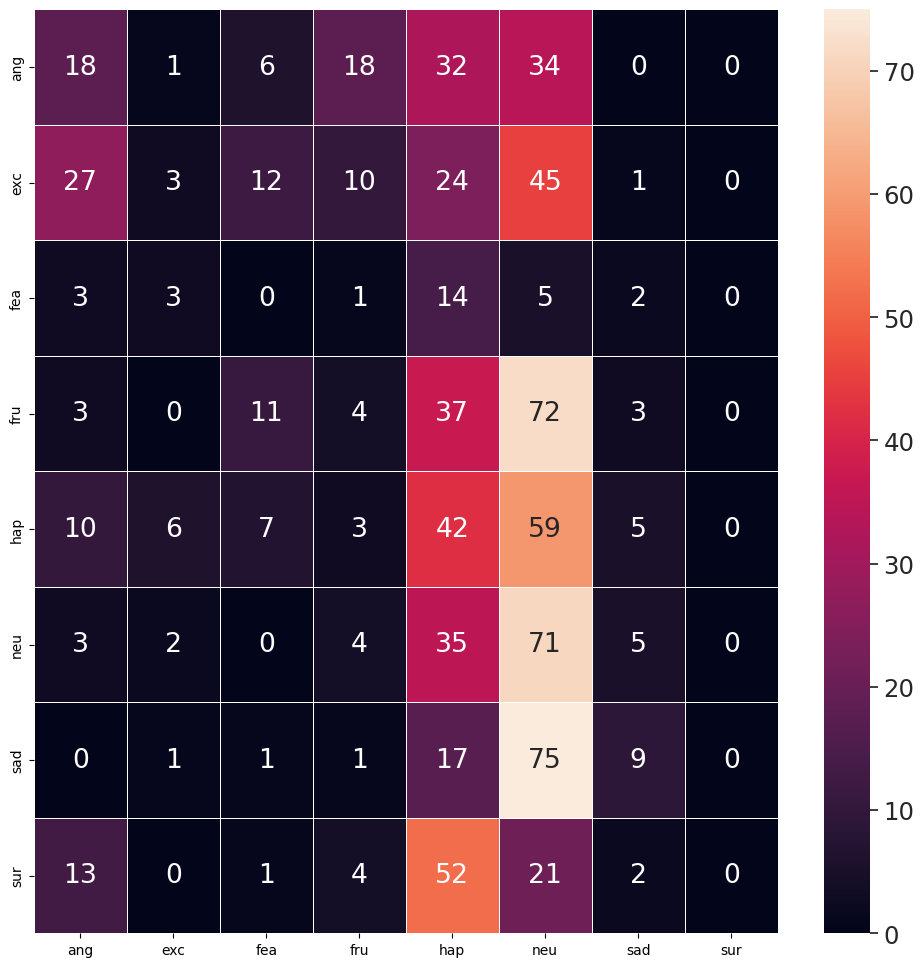

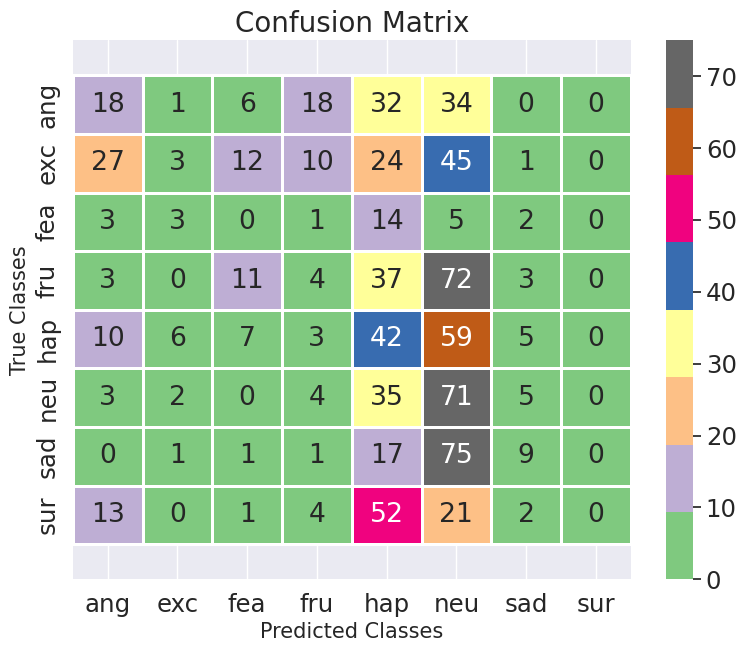

In [46]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/kaggle/input/german-model/german_models/model1-emo-db.weights.h5')
model2 = load_model('/kaggle/input/german-model/german_models/model2-emo-db.weights.h5')
model3 = load_model('/kaggle/input/german-model/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db-model-2.png')
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
Weighted average method
Accuracy Score for model1 =  0.16945107398568018
Accuracy Score for model2 =  0.15632458233890215
Accuracy Score for model3 =  0.19689737470167065
Accuracy Score for average ensemble =  0.18496420047732698
Accuracy Score for weighted average ensemble =  0.1873508353221957


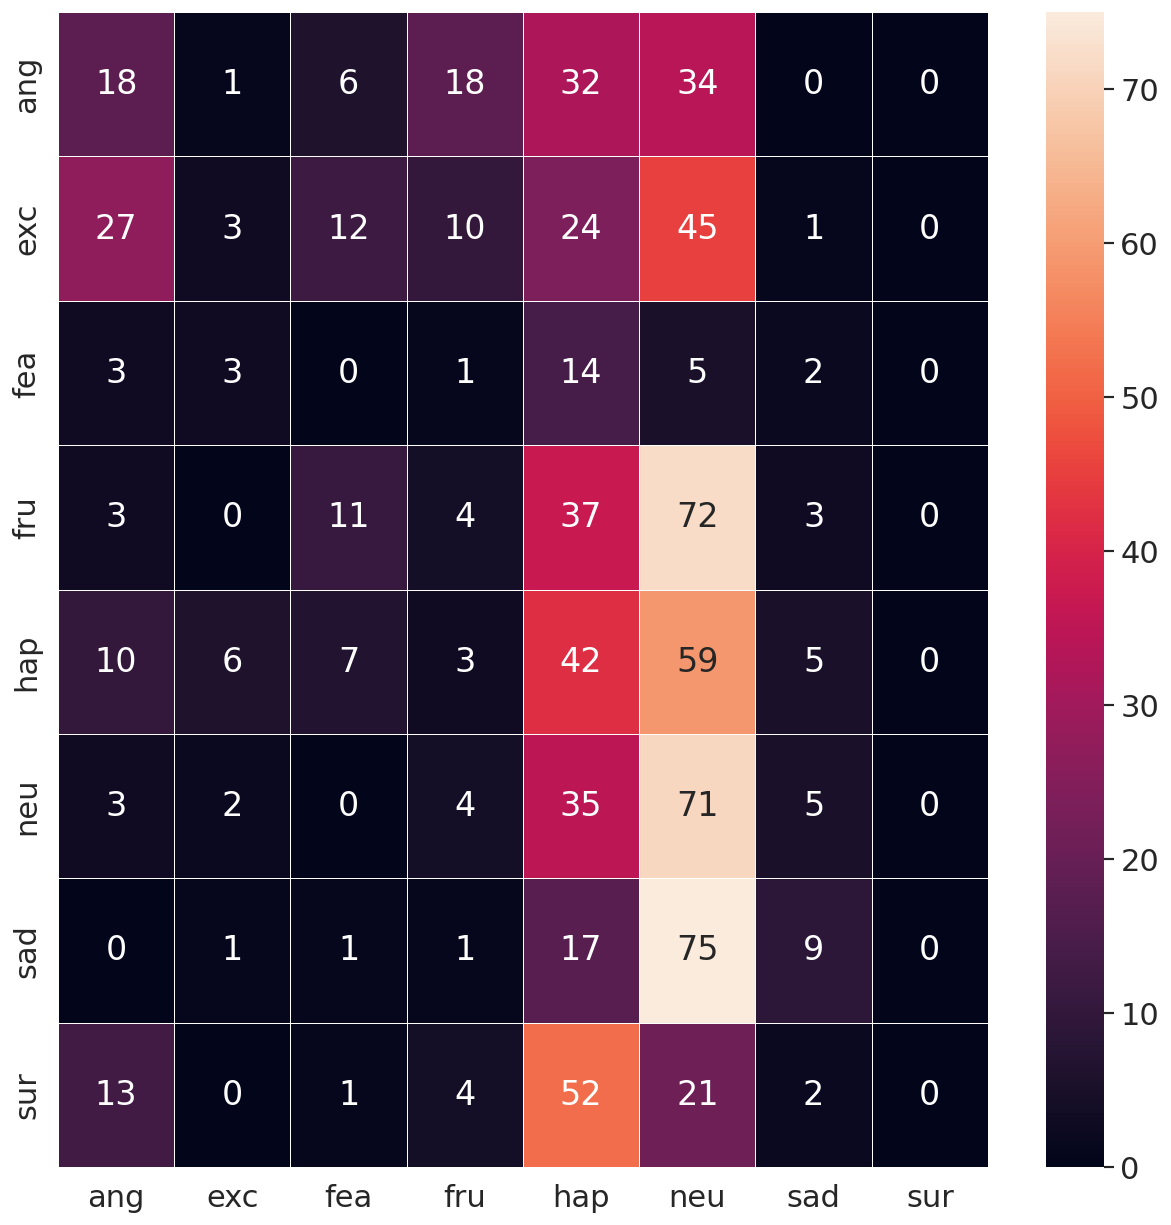

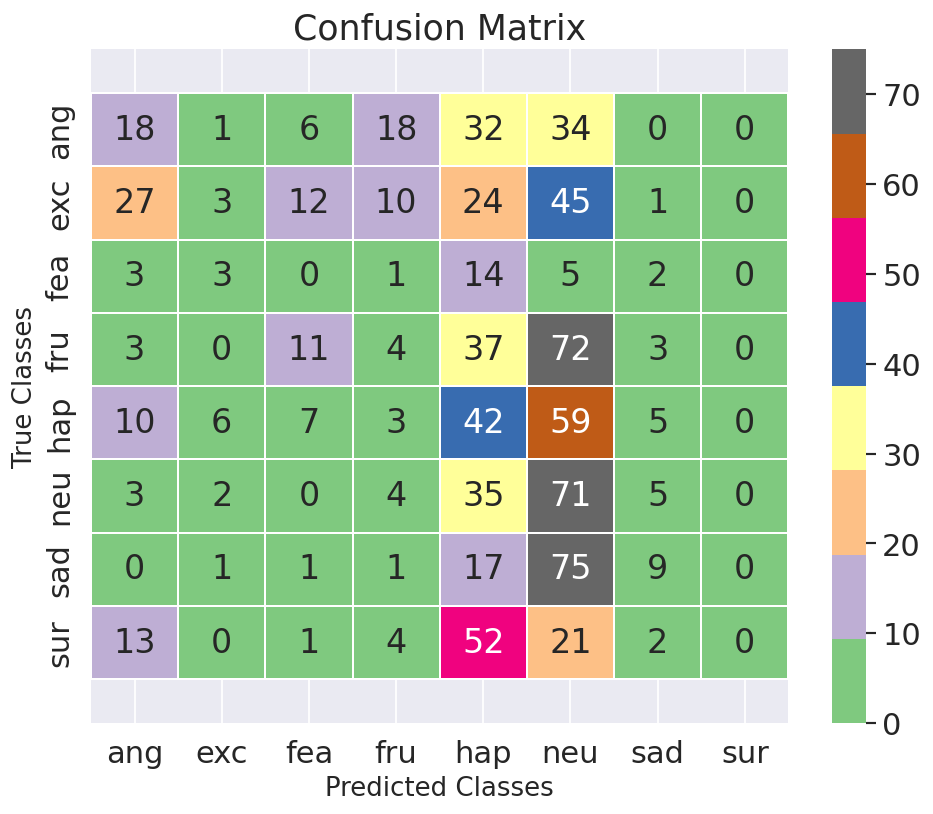

In [47]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('SAVEE-EMSEMBLE.png')
plt.show()